In [11]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [12]:
actions = [
    'normal',
    'abnormal',
    'fall',
    'lie',
    'error'
]
#여기에 numpy파일을 여러개 load하면 여러개의 동작데이터를 삽입할 수 있음.

import os

filePath = "dataset"
data = []
idx = 0
for (root, directories, files) in os.walk(filePath):
    for file in files:
        if file.startswith("raw"):# exclude raw dataset
            continue
        print(file)
        file_path = os.path.join(root, file)
        if np.load(file_path).shape[0] == 0:# exclude unavailable array
            continue
        if idx == 0:
            data = np.concatenate([
                np.load(file_path)
            ], axis=0)
        data = np.concatenate([
            np.array(data),
            np.load(file_path)
        ], axis=0)
        idx += 1

data.shape

seq_abnormal_1650191843.npy
seq_abnormal_1650191850.npy
seq_abnormal_1650191857.npy
seq_abnormal_1650191970.npy
seq_error_1650192529.npy
seq_error_1650192541.npy
seq_error_1650192545.npy
seq_error_1650192548.npy
seq_error_1650192552.npy
seq_error_1650192558.npy
seq_error_1650192562.npy
seq_error_1650192566.npy
seq_error_1650192585.npy
seq_error_1650192593.npy
seq_fall_1650192042.npy
seq_fall_1650192044.npy
seq_fall_1650192046.npy
seq_fall_1650192048.npy
seq_fall_1650192049.npy
seq_fall_1650192050.npy
seq_fall_1650192054.npy
seq_fall_1650192056.npy
seq_fall_1650192059.npy
seq_fall_1650192060.npy
seq_fall_1650192062.npy
seq_fall_1650192064.npy
seq_fall_1650192067.npy
seq_fall_1650192069.npy
seq_fall_1650192070.npy
seq_fall_1650192072.npy
seq_fall_1650192075.npy
seq_fall_1650192078.npy
seq_fall_1650192081.npy
seq_fall_1650192084.npy
seq_fall_1650192086.npy
seq_fall_1650192089.npy
seq_fall_1650192092.npy
seq_fall_1650192094.npy
seq_fall_1650192097.npy
seq_fall_1650192099.npy
seq_fall_16501

(16809, 20, 162)

In [13]:
x_data = data[:, :, :-1] # 정답레이블 제거
labels = data[:, 0, -1] # 정답레이블 추출

print(x_data.shape)
print(labels.shape)

(16809, 20, 161)
(16809,)


In [14]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions)) # 원핫인코딩 (1,0,0), (0,1,0), (0,0,1)
y_data.shape

(16809, 5)

In [15]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2022) # 학습데이터와 검증데이터 분리

print(x_train.shape, y_train.shape) # 학습데이터 및 정답레이블
print(x_val.shape, y_val.shape) #검증데이터 및 정답레이블

(15128, 20, 161) (15128, 5)
(1681, 20, 161) (1681, 5)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

model = Sequential([
    GRU(units=64, activation='relu', input_shape=x_train.shape[1:3], return_sequences=True),
    Dropout(0.2),
    GRU(units=64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 20, 64)            43584     
                                                                 
 dropout_2 (Dropout)         (None, 20, 64)            0         
                                                                 
 gru_3 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 70,789
Trainable params: 70,789
Non-trai

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    batch_size = 256,
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/modelV3.0_GRU_lying.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
59/60 [============================>.] - ETA: 0s - loss: 2.7685 - acc: 0.5332
Epoch 1: val_acc improved from -inf to 0.69423, saving model to models\modelV3.0_GRU_lying.h5
60/60 [==============================] - 4s 42ms/step - loss: 2.7657 - acc: 0.5335 - val_loss: 0.9466 - val_acc: 0.6942 - lr: 0.0010
Epoch 2/200
59/60 [============================>.] - ETA: 0s - loss: 1.0041 - acc: 0.6591
Epoch 2: val_acc improved from 0.69423 to 0.70851, saving model to models\modelV3.0_GRU_lying.h5
60/60 [==============================] - 2s 37ms/step - loss: 1.0035 - acc: 0.6593 - val_loss: 0.8384 - val_acc: 0.7085 - lr: 0.0010
Epoch 3/200
59/60 [============================>.] - ETA: 0s - loss: 0.8479 - acc: 0.7001
Epoch 3: val_acc improved from 0.70851 to 0.74361, saving model to models\modelV3.0_GRU_lying.h5
60/60 [==============================] - 2s 37ms/step - loss: 0.8476 - acc: 0.7001 - val_loss: 0.7050 - val_acc: 0.7436 - lr: 0.0010
Epoch 4/200
59/60 [========================

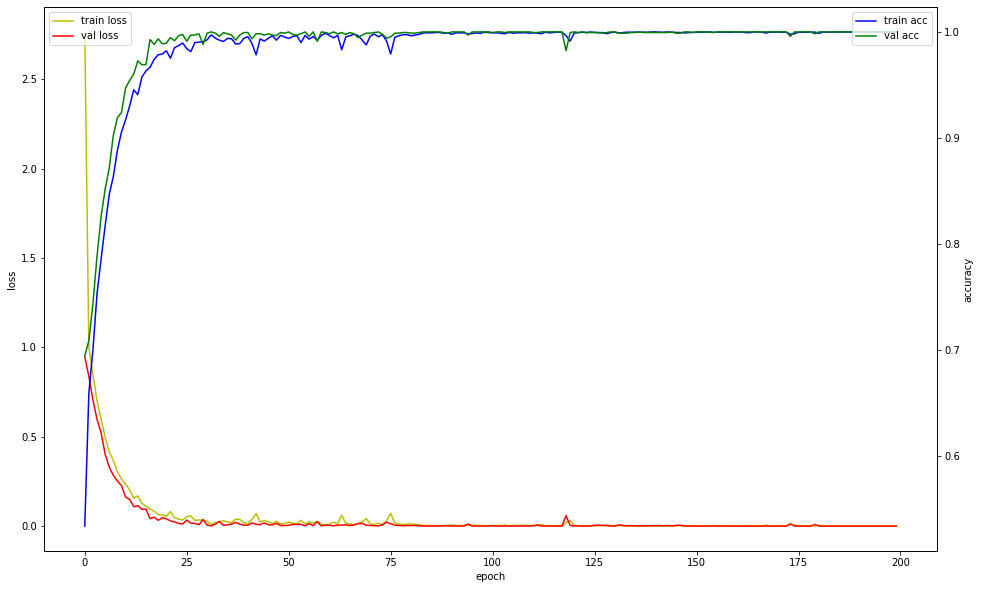

In [18]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [19]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/modelV3.0_GRU_lying.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[ 533,    0],
        [   0, 1148]],

       [[1599,    0],
        [   0,   82]],

       [[1568,    0],
        [   0,  113]],

       [[1382,    0],
        [   0,  299]],

       [[1642,    0],
        [   0,   39]]], dtype=int64)

In [20]:

history.model.save('models/modelV3.1_GRU_lying.h5')
